<a href="https://colab.research.google.com/github/asokraju/ml-grinding/blob/master/Deep_AI/Course-1/Course_1_week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Horse dataset

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop, Adam
import numpy as np
import matplotlib.pyplot as plt
import random

print(tf.__version__)

2.2.0


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-07-27 16:25:41--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  31.5MB/s    in 4.5s    

2020-07-27 16:25:46 (31.5 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [ ]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [ ]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse31-8.png', 'horse02-3.png', 'horse44-3.png', 'horse27-1.png', 'horse44-9.png', 'horse22-8.png', 'horse14-2.png', 'horse37-1.png', 'horse39-2.png', 'horse37-3.png']
['human08-05.png', 'human16-05.png', 'human11-11.png', 'human02-14.png', 'human13-05.png', 'human02-30.png', 'human04-17.png', 'human16-29.png', 'human10-08.png', 'human04-19.png']


In [ ]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

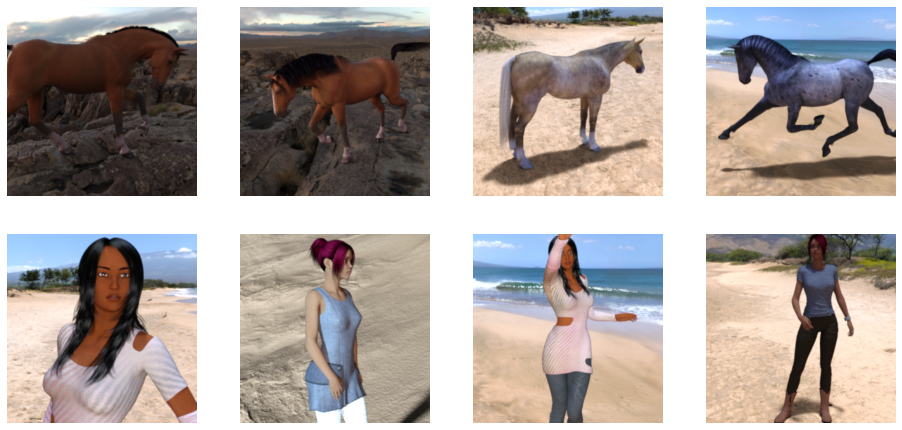

In [ ]:
random_horses = np.random.choice(train_horse_names, size = 4, replace=False)
random_humans = np.random.choice(train_human_names, size = 4, replace=False)
next_horse_pix = [os.path.join(train_horse_dir, fname)  for fname in random_horses]
next_human_pix = [os.path.join(train_human_dir, fname)  for fname in random_humans]


fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
model = models.Sequential([
                           Conv2D(filters = 16, kernel_size=(3,3), activation='relu', input_shape = (300, 300,3)),
                           MaxPooling2D(2,2),
                           Conv2D(filters = 32, kernel_size=(3,3), activation ='relu'),
                           MaxPooling2D(2,2),
                           Conv2D(filters = 64, kernel_size=(3,3), activation ='relu'),
                           MaxPooling2D(2,2),
                           Conv2D(filters = 64, kernel_size=(3,3), activation ='relu'),
                           MaxPooling2D(2,2),
                           Conv2D(filters = 64, kernel_size=(3,3), activation ='relu'),
                           MaxPooling2D(2,2),
                           Conv2D(filters = 128, kernel_size=(3,3), activation ='relu'),
                           MaxPooling2D(2,2),
                           Flatten(),
                           Dense(units = 512, activation = 'relu'),
                           Dense(units = 1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [ ]:
model.compile(optimizer= RMSprop(0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

##Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

parent_dir = '/tmp/horse-or-human'
train_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    parent_dir,
    target_size = (300, 300),
    batch_size = 128,
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.


##training

In [ ]:
model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs = 15,
    verbose=1
)

Epoch 1/15
8/8 [==============================] - 6s 708ms/step - loss: 0.7223 - accuracy: 0.5039
Epoch 2/15
8/8 [==============================] - 6s 759ms/step - loss: 1.0322 - accuracy: 0.6463
Epoch 3/15
8/8 [==============================] - 6s 742ms/step - loss: 0.5657 - accuracy: 0.7720
Epoch 4/15
8/8 [==============================] - 6s 734ms/step - loss: 0.5116 - accuracy: 0.7987
Epoch 5/15
8/8 [==============================] - 7s 836ms/step - loss: 0.2578 - accuracy: 0.9033
Epoch 6/15
8/8 [==============================] - 6s 739ms/step - loss: 0.2762 - accuracy: 0.8721
Epoch 7/15
8/8 [==============================] - 6s 750ms/step - loss: 0.3545 - accuracy: 0.8888
Epoch 8/15
8/8 [==============================] - 6s 696ms/step - loss: 0.2628 - accuracy: 0.9032
Epoch 9/15
8/8 [==============================] - 6s 729ms/step - loss: 0.9224 - accuracy: 0.8598
Epoch 10/15
8/8 [==============================] - 7s 873ms/step - loss: 0.1968 - accuracy: 0.9244
Epoch 11/15
8/8 [==

##running the model

In [ ]:
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    path = '/content/' + fn 
    img = image.load_img(path, target_size = (300, 300))
    x = image.img_to_array(img)
    print(x.shape)
    x = np.expand_dims(x, axis=0)
    print(x.shape)
    images = np.vstack([x])
    print(images.shape)
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(fn + " is a human")   
    else:
         print(fn + " is a horse")

Saving download (4).jfif to download (4).jfif
(300, 300, 3)
(1, 300, 300, 3)
(1, 300, 300, 3)
[0.]
download (4).jfif is a horse


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

Saving images (3).jfif to images (3).jfif
[0.]
images (3).jfif is a horse


In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]

Visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files+human_img_files)

img = load_img(img_path, target_size = (300, 300))
x = img_to_array(img)
x = np.expand_dims(x,  axis =0)
print(x.shape)
x /= 255.0

(1, 300, 300, 3)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


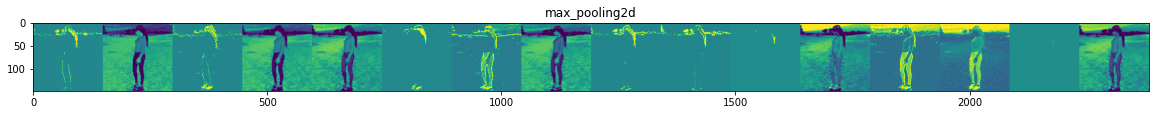

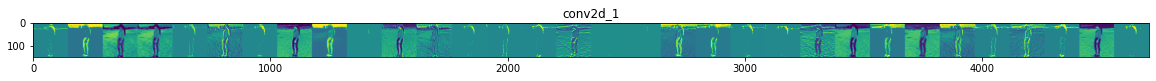

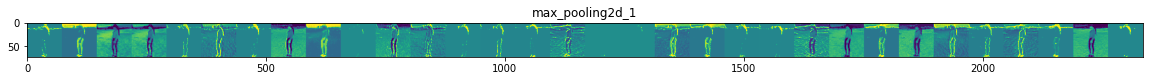

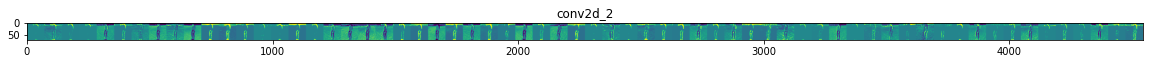

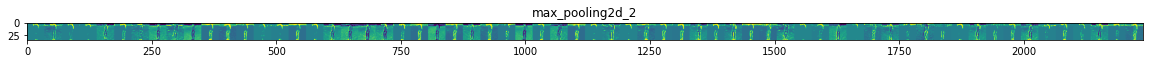

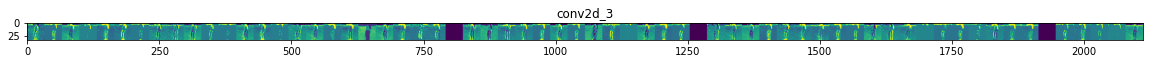

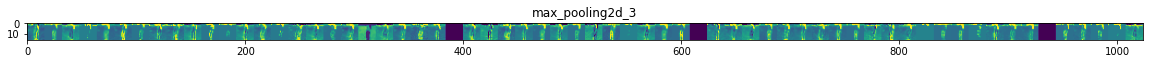

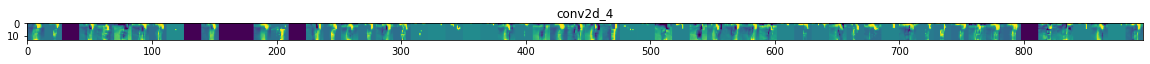

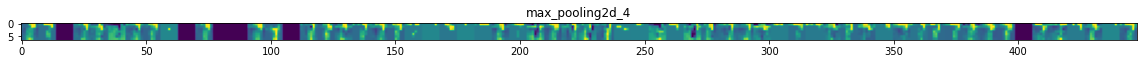

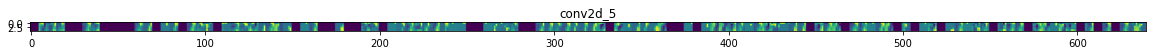

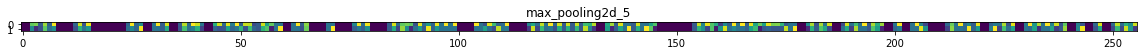

In [ ]:
successive_feature_maps = visualization_model.predict(x)


layer_names = [layer.name for layer in model.layers[1:]]


for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]
        size = feature_map.shape[1]
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            # Postprocess the feature to make it visually palatable
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            # We'll tile each filter into this big horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x
            # Display the grid
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')


In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# Including Validation set

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-07-27 17:36:59--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 108.177.125.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  55.6MB/s    in 2.6s    

2020-07-27 17:37:02 (55.6 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2020-07-27 17:37:04--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 108.177.125.128, 74.125.23.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1

In [ ]:
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [ ]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_humandir = os.path.join('/tmp/horse-or-human/human')
# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [ ]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])
validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse31-8.png', 'horse02-3.png', 'horse44-3.png', 'horse27-1.png', 'horse44-9.png', 'horse22-8.png', 'horse14-2.png', 'horse37-1.png', 'horse39-2.png', 'horse37-3.png']
['human08-05.png', 'human16-05.png', 'human11-11.png', 'human02-14.png', 'human13-05.png', 'human02-30.png', 'human04-17.png', 'human16-29.png', 'human10-08.png', 'human04-19.png']
['horse4-599.png', 'horse3-541.png', 'horse3-070.png', 'horse5-275.png', 'horse3-141.png', 'horse5-018.png', 'horse5-164.png', 'horse5-032.png', 'horse3-198.png', 'horse4-102.png']
['valhuman03-01.png', 'valhuman05-15.png', 'valhuman04-15.png', 'valhuman05-03.png', 'valhuman05-23.png', 'valhuman02-02.png', 'valhuman05-00.png', 'valhuman04-19.png', 'valhuman03-05.png', 'valhuman02-20.png']


In [ ]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


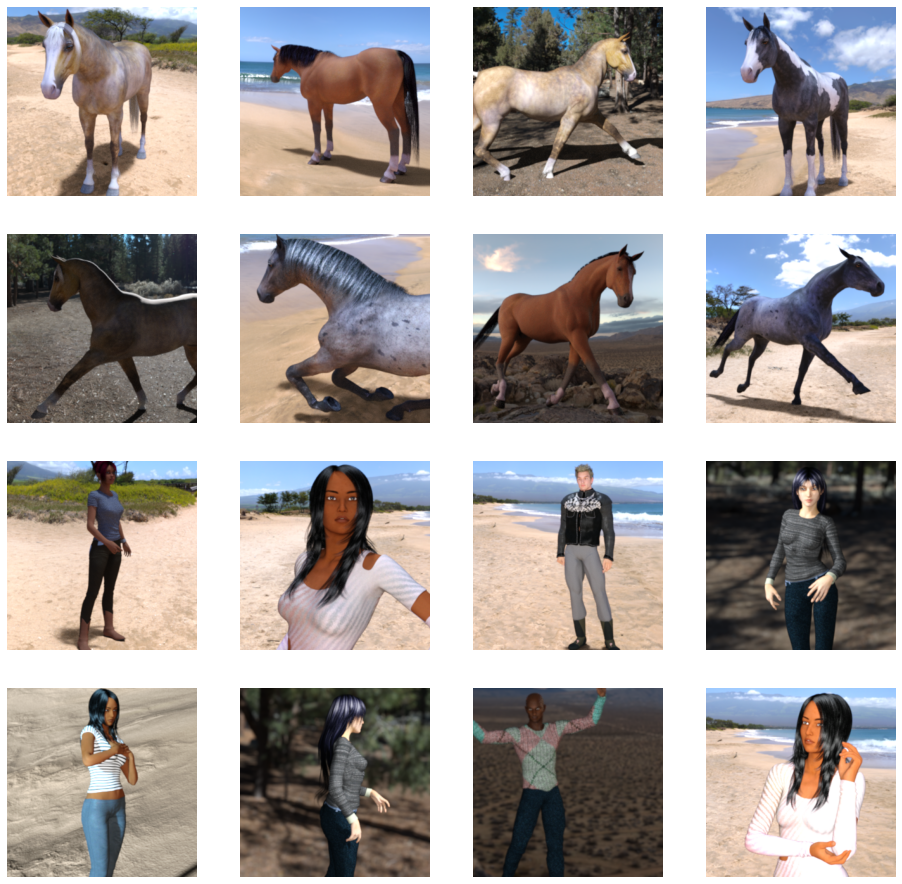

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)
train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human/',
    target_size = (300, 300),
    batch_size = 128,
    class_mode = 'binary'
)
validation_generator = validation_datagen.flow_from_directory(
    '/tmp/validation-horse-or-human/',
    target_size = (300, 300),
    batch_size = 32,
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 8s 1s/step - loss: 0.6070 - accuracy: 0.8676 - val_loss: 1.1640 - val_accuracy: 0.8242
Epoch 2/15
8/8 [==============================] - 8s 1s/step - loss: 0.0861 - accuracy: 0.9639 - val_loss: 1.0970 - val_accuracy: 0.8320
Epoch 3/15
8/8 [==============================] - 8s 967ms/step - loss: 0.0425 - accuracy: 0.9867 - val_loss: 1.8991 - val_accuracy: 0.7852
Epoch 4/15
8/8 [==============================] - 8s 1s/step - loss: 0.0556 - accuracy: 0.9873 - val_loss: 1.1034 - val_accuracy: 0.8477
Epoch 5/15
8/8 [==============================] - 8s 971ms/step - loss: 0.0477 - accuracy: 0.9844 - val_loss: 0.6286 - val_accuracy: 0.8672
Epoch 6/15
8/8 [==============================] - 8s 950ms/step - loss: 0.0161 - accuracy: 0.9967 - val_loss: 4.0634 - val_accuracy: 0.7812
Epoch 7/15
8/8 [==============================] - 7s 929ms/step - loss: 0.2437 - accuracy: 0.9444 - val_loss: 0.7298 - val_accuracy: 0.8633
Epoch 8/15
8/8 [=============